### Lets understand the batch-norm 


> **why do we need  batch-norm ?**

- When we train large neural networks, normalizing data helps in achieving stable and better training. 

- Normalized data typically means having a mean of 0 and a standard deviation of 1.

- If the data is not normalized, we can't use a large learning rate effectively. 

- This can lead to non-convergence or the training process taking a lot longer to complete properly.

- Normally, we normalize the inputs to the network to ensure that the data is well-behaved and the training is more efficient.

- In Batch Normalization, we normalize the inputs of the activation function, not just the initial input data. This helps in several ways:

  - internal covariate shift 

  - gradient shattering (of resnet)


> **what is Covariate shift ?**

- example : - if we train the model of image classification of rose or not rose but with only images of red roses and at time of testing we provide the images of roses with diff colour then model might not recosined it. (high level example)

> **Internal Covariate Shift:**

- Internal covariate shift refers to the change in the distribution of network activations due to the updating of network parameters during training.

- Batch normalization helps to reduce this internal covariate shift by normalizing the output of each layer to have a mean of zero and a variance of one.

- By normalizing the inputs of each layer, batch normalization ensures that the distribution of the activations remains consistent during training, which helps in stabilizing and speeding up the training process.

- only first layer in network gets input from the data.(then weights get applied)

- then every other layer in netwok gets input from the previous layer.(the inputs depends on the values of data)

- means the distriubuition of the inputs is constantly changing due to the training become unstable.

- batch-norm make sure that the inputs become nomalise so training can become stable.


> **How Batch-Norm work ?**


- Data should be fed for training in mini-batches.

- Batch Normalization is applied layer by layer in the network.
- In a forward pass, data goes through: data -> linear transformation -> activation -> output (y).
- With Batch Normalization, the process becomes: data -> linear transformation -> batch-norm -> activation -> output (y).
- We do not use Batch Normalization after activation functions like ReLU because ReLU only passes positive inputs, which changes the distribution of data.
- To calculate Batch Normalization, we need the mean and standard deviation.
- We calculate the mean and standard deviation from a batch of data (that's why we need the data in batches).
- Training data is divided into mini-batches to make computation more efficient and to stabilize the training process by averaging out noise in the gradient updates.
- Batch Normalization is applied to the inputs of each layer, ensuring that the inputs to activation functions are normalized.

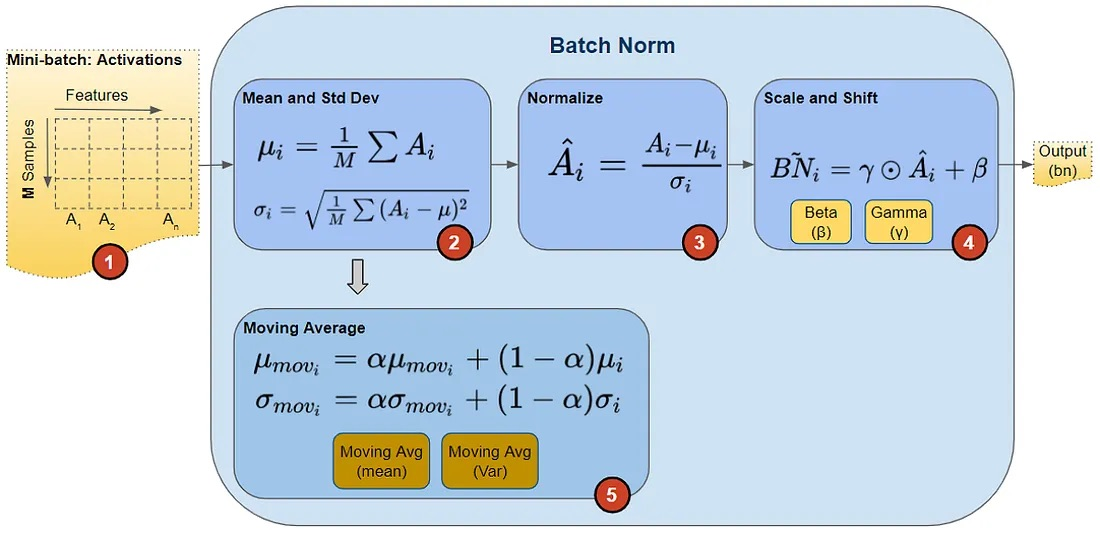

***Three Steps***

- 1.Calculate mean and standard deviation

- 2.Normalize using mean and standard deviation

- 3.Scale and shift using gamma and beta

- The gamma and beta are learnable parameters.
- each neuron will have its own gamma and beta.
- Generally, the default values are set as gamma = 1 and beta = 0 in most libraries.
- The question is, why do we need it?
- BatchNorm basically scales the data points into the same distribution.
- But in some cases, the model doesn't need every data point in the same range, so it adjusts using these parameters.
- These are updated by gradient descent, just like weights and biases.


---

> **lets manually calculate the batch norm with 5 mini-batch size and two neuron**

Neuron 1: 1, 2, 3, 4, 5
Neuron 2: 2, 4, 6, 8, 10

**1. Calculate Mean for Each Neuron:**
* Mean1 = (1 + 2 + 3 + 4 + 5) / 5 = 15 / 5 = 3
* Mean2 = (2 + 4 + 6 + 8 + 10) / 5 = 30 / 5 = 6

**2. Calculate Variance for Each Neuron:**
* Var1 = [(1 - 3)^2 + (2 - 3)^2 + (3 - 3)^2 + (4 - 3)^2 + (5 - 3)^2] / 5 = (4 + 1 + 0 + 1 + 4) / 5 = 10 / 5 = 2
* Var2 = [(2 - 6)^2 + (4 - 6)^2 + (6 - 6)^2 + (8 - 6)^2 + (10 - 6)^2] / 5 = (16 + 4 + 0 + 4 + 16) / 5 = 40 / 5 = 8

**3. Calculate Standard Deviation for Each Neuron:**
* Std1 = sqrt(Var1) = sqrt(2) ≈ 1.41
* Std2 = sqrt(Var2) = sqrt(8) ≈ 2.83

**4. Normalize Each Neuron's Data:**
* Norm_x1 = (x1 - Mean1) / Std1
  * Norm_x1 = [(1 - 3) / 1.41, (2 - 3) / 1.41, (3 - 3) / 1.41, (4 - 3) / 1.41, (5 - 3) / 1.41]
  * Norm_x1 ≈ [-1.41, -0.71, 0, 0.71, 1.41]
* Norm_x2 = (x2 - Mean2) / Std2
  * Norm_x2 = [(2 - 6) / 2.83, (4 - 6) / 2.83, (6 - 6) / 2.83, (8 - 6) / 2.83, (10 - 6) / 2.83]
  * Norm_x2 ≈ [-1.41, -0.71, 0, 0.71, 1.41]

**5. Scale and Shift (Using learnable parameters gamma and beta):**
* Let's assume gamma1 = 1, beta1 = 0 for Neuron 1
* Let's assume gamma2 = 1, beta2 = 0 for Neuron 2
* BN_x1 = gamma1 * Norm_x1 + beta1
  * BN_x1 = [1 * -1.41 + 0, 1 * -0.71 + 0, 1 * 0 + 0, 1 * 0.71 + 0, 1 * 1.41 + 0]
  * BN_x1 ≈ [-1.41, -0.71, 0, 0.71, 1.41]
* BN_x2 = gamma2 * Norm_x2 + beta2
  * BN_x2 = [1 * -1.41 + 0, 1 * -0.71 + 0, 1 * 0 + 0, 1 * 0.71 + 0, 1 * 1.41 + 0]
  * BN_x2 ≈ [-1.41, -0.71, 0, 0.71, 1.41]

---

> **Batch Normalization During Testing**

- During training, Batch Normalization uses the mean and standard deviation calculated from the current mini-batch.

- However, during testing, we don't have mini-batches like in training, and using batch-specific statistics would be inconsistent.
- Instead, Batch Normalization uses running averages of the means and variances that were calculated during training.
- These running averages are computed over all mini-batches seen during training, providing a stable estimate of the mean and variance for each layer.

> **Why Apply Batch Normalization During Testing?**

- Consistency: Using the running averages ensures that the data distribution during testing matches the distribution seen during training.

- Stability: It helps maintain the stability of the model's predictions since the test data is normalized in a manner consistent with the training data.
- Performance: It allows the model to make accurate predictions by ensuring that the inputs to each layer are scaled and shifted appropriately, just as they were during training.

- the 5th process in fig.(calculating the exp weight moving avg)

- through that formula we calculat it during training for testing.


### Code 

In [3]:
import numpy as np
import torch
import torch.nn as nn

# Custom Batch Normalization Implementation
class CustomBatchNorm:
    def __init__(self, num_features, epsilon=1e-5, momentum=0.1):
        self.num_features = num_features
        self.epsilon = epsilon
        self.momentum = momentum

        self.gamma = np.ones(num_features)
        self.beta = np.zeros(num_features)

        self.running_mean = np.zeros(num_features)
        self.running_var = np.ones(num_features)

        self.training = True

    def forward(self, x):
        if self.training:
            self.batch_mean = np.mean(x, axis=0)
            self.batch_var = np.var(x, axis=0)

            self.x_normalized = (x - self.batch_mean) / np.sqrt(self.batch_var + self.epsilon)
            self.out = self.gamma * self.x_normalized + self.beta

            self.running_mean = self.momentum * self.batch_mean + (1 - self.momentum) * self.running_mean
            self.running_var = self.momentum * self.batch_var + (1 - self.momentum) * self.running_var
        else:
            x_normalized = (x - self.running_mean) / np.sqrt(self.running_var + self.epsilon)
            self.out = self.gamma * x_normalized + self.beta

        return self.out

    def backward(self, dout):
        batch_size = dout.shape[0]

        dgamma = np.sum(dout * self.x_normalized, axis=0)
        dbeta = np.sum(dout, axis=0)

        dx_normalized = dout * self.gamma
        dvar = np.sum(dx_normalized * (self.x - self.batch_mean) * -0.5 * np.power(self.batch_var + self.epsilon, -1.5), axis=0)
        dmean = np.sum(dx_normalized * -1 / np.sqrt(self.batch_var + self.epsilon), axis=0) + dvar * np.sum(-2 * (self.x - self.batch_mean), axis=0) / batch_size

        dx = dx_normalized / np.sqrt(self.batch_var + self.epsilon) + dvar * 2 * (self.x - self.batch_mean) / batch_size + dmean / batch_size

        return dx, dgamma, dbeta

# PyTorch Batch Normalization
class PyTorchBatchNorm:
    def __init__(self, num_features):
        self.bn = nn.BatchNorm1d(num_features)
        self.bn.train()  # Set to training mode

    def forward(self, x):
        return self.bn(torch.tensor(x, dtype=torch.float32)).detach().numpy()

    def set_eval_mode(self):
        self.bn.eval()  # Set to evaluation mode


np.random.seed(42)
torch.manual_seed(42)

# Initialize Custom BatchNorm
custom_bn = CustomBatchNorm(num_features=3)

# Initialize PyTorch BatchNorm
pytorch_bn = PyTorchBatchNorm(num_features=3)

# Example input (mini-batch of size 4 and 3 features)
x = np.random.randn(4, 3)

# Custom BatchNorm Forward Pass
custom_out = custom_bn.forward(x)
print("Custom BatchNorm Output:\n", custom_out)

# PyTorch BatchNorm Forward Pass
pytorch_out = pytorch_bn.forward(x)
print("PyTorch BatchNorm Output:\n", pytorch_out)


Custom BatchNorm Output:
 [[-1.04313887 -0.25883405  1.69428946]
 [ 0.94434811 -0.46367483 -0.22585502]
 [ 1.05314787  1.67594423 -0.73829412]
 [-0.95435711 -0.95343535 -0.73014031]]
PyTorch BatchNorm Output:
 [[-1.043139   -0.25883406  1.6942896 ]
 [ 0.9443481  -0.46367487 -0.22585502]
 [ 1.0531478   1.6759443  -0.7382941 ]
 [-0.95435715 -0.95343536 -0.7301403 ]]
